<a href="https://colab.research.google.com/github/sundarrajanbalasubramanian/Statistics_for_datascience_-with_Python_IBM/blob/main/Statistics_for_Data_Science_with_Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Project describes the boston housing data analysis in Python to inform the policy and decision makers

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install statsmodels

Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import scipy.stats as stats

Import the datafile from the URL and save it in a dataframe

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

**Task : Generating Descriptive Statistics and Visualizations:**

1. Generating a boxplot of Median value of owner-occupied homes

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of Owner-occupied homes')

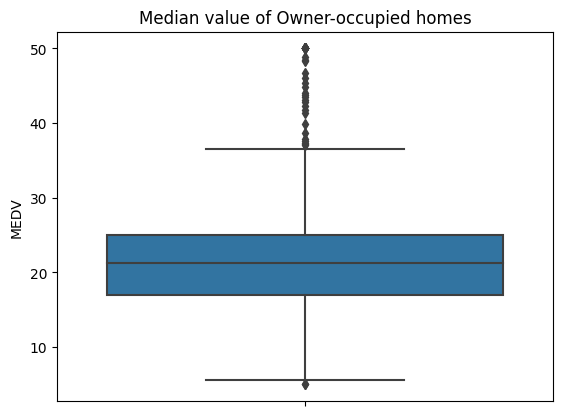

In [8]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Median value of Owner-occupied homes')

Inference :This boxplot describes the median values of owner-occupied homes according to the boston housing data. The data shows a median of 20 such houses that were occupied by the owners

2.Drawing bar plot for the charles river variable

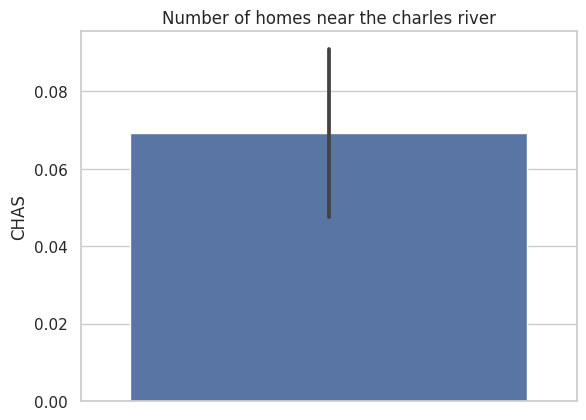

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
ax.set_title('Number of homes near the charles river')
plt.show()

Description :Barplot shows number of homes near the charles river.

 3. Drawing Boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older).

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

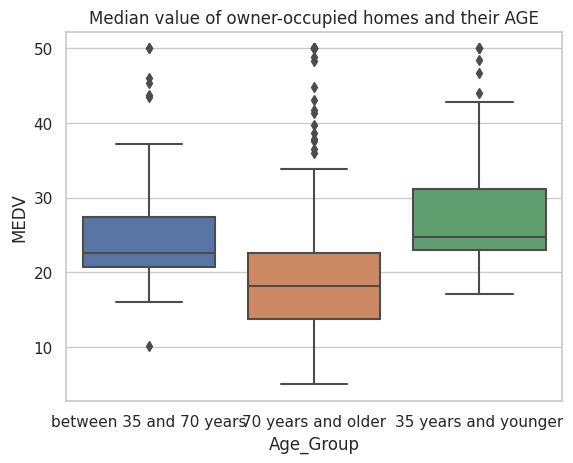

In [9]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='Age_Group', y='MEDV', data = boston_df)
ax.set_title('Median value of owner-occupied homes and their AGE')
plt.show()

Inference : The above boxplot shows that the 70 years and older having least median ie., Ownner occupied homes are less in the age range of 70 and above while 35 years and younger having higher number of owner occupied homes.

4.Drawing the scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

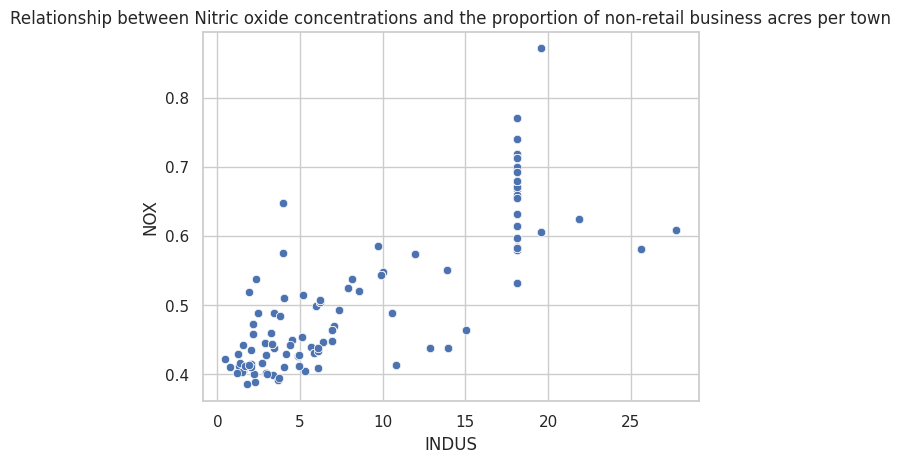

In [16]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

Inference : It can be seen that from the scatter plot the relationship relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town having low positive correlation ie., though both variables having relationship but not strong enough to make great impact.

5. Drawing a histogram for the pupil to teacher ratio by town variable

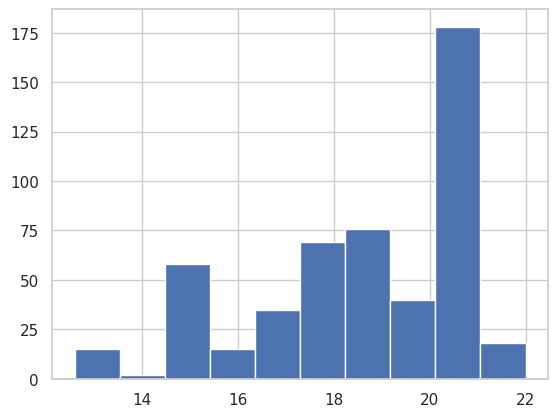

In [44]:
plt.hist(boston_df['PTRATIO'])
plt.show()

Inference : The histogram shows that the distribution of pupil to teacher ration is left skewed. Around 180 towns having more than 20 as pupil to teacher ratio while less than 10 towns having pupil to ratio as 14.

**Task : Statistical tests to analyse the given data**

Question 1 : Is there a significant difference in median value of houses bounded by the Charles river or not?

State the hypothesis:

H_0: There is no significant difference in median value of houses bounded by the Charles river.

H_1: There a significant difference in median value of houses bounded by the Charles river.



In [54]:
# T-test
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_Ttest'] = 'NO'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_Ttest'] = 'YES'


scipy.stats.ttest_ind(boston_df[boston_df['CHAS_Ttest'] == 'NO']['MEDV'],
                   boston_df[boston_df['CHAS_Ttest'] == 'YES']['MEDV'], equal_var = True)




Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Inference : Since the p-value is less than 0.05, we may reject the Null Hypothesis, and state that there exists a significant difference in median value of houses bounded by the charles river.


Question 2 : Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

State the hypothesis:

H_0: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

H_1: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [4]:
# ANOVA
# Use OLS function from the statsmodel library
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data=boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)
p_value = table.loc['AGE', 'PR(>F)']
print("p-value:", p_value)


             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN
p-value: 1.5699822091884541e-18


Inference : We reject the null hypothesis since the p-value is less than 0.05. Hence we conclude that there is a significant difference in Median values of houses(MEDV) for each proportion of owner occupied units built prior to 1940.

Question 3 : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

H_0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H_1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [23]:
corr_coeff, p_value = stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)


Pearson correlation coefficient: 0.7636514469209151
p-value: 7.913361061239527e-98


Inference : Pearsons Correlation analysis shows the r value to be 0.76 which indicates a positive correlation. Hence we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Question 4 :What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

State the hypothesis:

H_0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

H_1: There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [13]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        08:46:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference : Since the p-value < 0.05, we may reject the Null hypothesis and conclude that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.